In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nagoya_Station_data = pd.read_excel("./datas/Nagoya_Station_data(josha).xlsx")

print(Nagoya_Station_data)

      year  station_no station_name  station_cd  station_g_cd  josha_num  \
0     1991         0.0          大曽根     1141105       1141105  4785428.0   
1     1992         0.0          大曽根     1141105       1141105  4660204.0   
2     1993         0.0          大曽根     1141105       1141105  4592223.0   
3     1994         0.0          大曽根     1141105       1141105  4669642.0   
4     1995         0.0          大曽根     1141105       1141105  4629653.0   
5     1996         0.0          大曽根     1141105       1141105  4498914.0   
6     1997         0.0          大曽根     1141105       1141105  4663364.0   
7     1998         0.0          大曽根     1141105       1141105  4619636.0   
8     1999         0.0          大曽根     1141105       1141105  4375248.0   
9     2000         0.0          大曽根     1141105       1141105  3744964.0   
10    2001         0.0          大曽根     1141105       1141105  4102394.0   
11    2002         0.0          大曽根     1141105       1141105  4219703.0   
12    2003  

In [2]:
#名古屋・金山・栄を抜く場合はここ
Nagoya_Station_data=Nagoya_Station_data[Nagoya_Station_data['station_name']!="名古屋"]#名古屋
Nagoya_Station_data=Nagoya_Station_data[Nagoya_Station_data['station_name']!="金山"]#金山
Nagoya_Station_data=Nagoya_Station_data[Nagoya_Station_data['station_name']!="栄"]#栄

In [3]:
#利用線数が0 つまりまだ駅ができていない場所を取り除く
Nagoya_Station_data=Nagoya_Station_data[Nagoya_Station_data['lines']!=0]

print(Nagoya_Station_data)

      year  station_no station_name  station_cd  station_g_cd  josha_num  \
0     1991         0.0          大曽根     1141105       1141105  4785428.0   
1     1992         0.0          大曽根     1141105       1141105  4660204.0   
2     1993         0.0          大曽根     1141105       1141105  4592223.0   
3     1994         0.0          大曽根     1141105       1141105  4669642.0   
4     1995         0.0          大曽根     1141105       1141105  4629653.0   
5     1996         0.0          大曽根     1141105       1141105  4498914.0   
6     1997         0.0          大曽根     1141105       1141105  4663364.0   
7     1998         0.0          大曽根     1141105       1141105  4619636.0   
8     1999         0.0          大曽根     1141105       1141105  4375248.0   
9     2000         0.0          大曽根     1141105       1141105  3744964.0   
10    2001         0.0          大曽根     1141105       1141105  4102394.0   
11    2002         0.0          大曽根     1141105       1141105  4219703.0   
12    2003  

In [4]:
#jrなどの利用者数を合算する為にgroupbyする
datas = Nagoya_Station_data.groupby(['station_name','year'])[['josha_num','lines']].sum()

print(datas)

                   josha_num  lines
station_name year                  
いりなか         1991  3632472.0      1
             1992  3549946.0      1
             1993  3572420.0      1
             1994  3484716.0      1
             1995  3517137.0      1
             1996  3564984.0      1
             1997  3667531.0      1
             1998  3822759.0      1
             1999  3774603.0      1
             2000  3872345.0      1
             2001  5957099.0      1
             2002  4311543.0      1
             2003  3949068.0      1
             2004  2831220.0      1
             2005  2664289.0      1
             2006  2709581.0      1
             2007  2701426.0      1
             2008  2759197.0      1
             2009  2723242.0      1
             2010  2882630.0      1
             2011  2489562.0      1
             2012  2521816.0      1
             2013  2614891.0      1
             2014  2589814.0      1
             2015  2613444.0      1
ささしまライブ      2004   119622.0

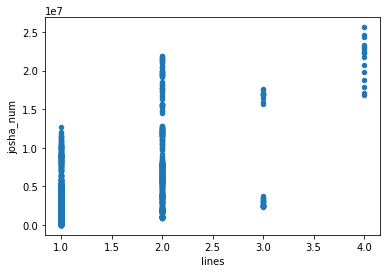

In [5]:
#横軸 駅数、縦軸　年間乗車数
datas.plot(x='lines',y='josha_num', kind='scatter')

In [6]:
datas.describe()

,josha_num,lines
count,3.184000e+03,3184.000000
mean,2.975076e+06,1.170226
std,3.477770e+06,0.437676
min,2.712000e+03,1.000000
25%,9.550472e+05,1.000000
50%,2.033244e+06,1.000000
75%,3.387841e+06,1.000000
max,2.560329e+07,4.000000


In [7]:
#相関係数
np.corrcoef(datas['lines'], datas['josha_num'])

array([[1.        , 0.58120452],
       [0.58120452, 1.        ]])

In [8]:
X=datas.lines.values
# X = np.vstack(datas.sum().lines)
# X = np.array([[value, 1] for value in X])

In [9]:
#Xと同じ長さの列を作成して、1埋めする
A = np.vstack([X, np.ones(len(X))]).T

In [10]:
Y = datas.josha_num.values
#Y=np.c_[Y]

In [11]:
#傾きa, 切片bを求める

a,b = np.linalg.lstsq(A,Y,rcond=None)[0]
print(a,b)

4618242.491157949 -2429311.7933588307


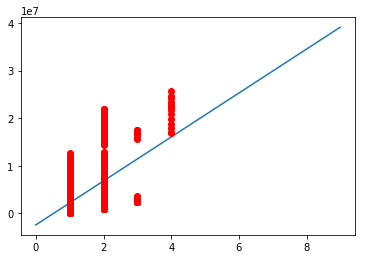

In [12]:
X2 = np.arange(0, 9, 0.01)

#推定Yのplot
plt.plot(X2, a*X2 + b)

#横軸 駅数、縦軸　年間乗車数
plt.plot(X,Y,'ro')

In [13]:
#決定係数を手計算する

#残差計算
child = ((datas['josha_num'] - (datas['lines']*a + b))**2).sum()
child

2.549343657836633e+16

In [14]:
#分母の計算
mother = ((datas['josha_num'] - datas['josha_num'].mean())**2).sum()
mother

3.849801645703784e+16

In [15]:
#決定係数
R = 1 - child / mother
R

0.33779869914035887